In [1]:
ls

Breast_Cancer/  Top20percent_genes.ipynb


In [2]:
ls Breast_Cancer


10X/  Alex/


# Top 20% predictable genes

## 10X

In [3]:
import os
import pandas as pd

res = os.listdir("./Breast_Cancer/10X/")
df = [pd.read_csv("./Breast_Cancer/10X/"+i, index_col=[0]) for i in res]
df = pd.concat(df)
df
    

,Pearson correlation,Gene,Slide,Method
ISG15,0.070338,ISG15,block1,Hist2ST
PLA2G2D,0.128043,PLA2G2D,block1,Hist2ST
CAMK2N1,0.179457,CAMK2N1,block1,Hist2ST
USP48,0.092823,USP48,block1,Hist2ST
TCEA3,0.214552,TCEA3,block1,Hist2ST
...,...,...,...,...
CYBB,0.122041,CYBB,block2,Hist2ST
ITM2A,0.100643,ITM2A,block2,Hist2ST
SH3BGRL,0.239077,SH3BGRL,block2,Hist2ST
BEX3,0.210675,BEX3,block2,Hist2ST


In [4]:
import pandas as pd

# Group by 'Slide'
grouped = df.groupby('Slide')

# Find top 20% genes for each slide based on Pearson correlation
result = pd.DataFrame()
top_genes_per_slide = []
for name, group in grouped:
    # Sort genes based on Pearson correlation
    sorted_genes = group.sort_values(by='Pearson correlation', ascending=False)

    # Calculate the index to select the top 25%
    top_20_percent_index = int(0.25 * len(sorted_genes))

    # Select top 20% genes
    top_20_percent_genes = sorted_genes.head(top_20_percent_index)

    # Append the result to the final DataFrame
    result = pd.concat([result, top_20_percent_genes])
    
    # Append the top genes for this slide to the list
    top_genes_per_slide.append(set(top_20_percent_genes['Gene']))

# Find the intersection of top genes across all slides
intersection_genes = set.intersection(*top_genes_per_slide)

# Display the intersection genes
print(f"There are {len(intersection_genes)} predictable genes across Alex and 10x datasets.\nIntersection of Top Genes Across Slides:\n{list(intersection_genes)}")

# Display the result
result


There are 35 predictable genes across Alex and 10x datasets.
Intersection of Top Genes Across Slides:
['TMEM258', 'TCEA3', 'MTCH2', 'CREB3L4', 'TTC39A', 'NPNT', 'KCTD3', 'TNFSF10', 'CPD', 'SMS', 'NAA20', 'CCL19', 'PTRH2', 'MAGEF1', 'ENY2', 'PTPRF', 'PFN2', 'TOP2A', 'MLLT6', 'WDR45B', 'INTS8', 'TSPAN13', 'SIPA1L3', 'MYO6', 'CASC3', 'HEBP2', 'CCT8', 'CPNE3', 'NEBL', 'PSMB2', 'GTF3C6', 'PLPP5', 'EPCAM', 'HIST1H2BD', 'NIT2']


,Pearson correlation,Gene,Slide,Method
PPP1R1B,0.310888,PPP1R1B,FFPE,Hist2ST
PPP1R1A,0.294287,PPP1R1A,FFPE,Hist2ST
CCL19,0.276856,CCL19,FFPE,Hist2ST
TRBC2,0.271768,TRBC2,FFPE,Hist2ST
IFI6,0.269015,IFI6,FFPE,Hist2ST
...,...,...,...,...
BEX3,0.210675,BEX3,block2,Hist2ST
CCL21,0.210445,CCL21,block2,Hist2ST
PLPP5,0.210134,PLPP5,block2,Hist2ST
GOSR1,0.209666,GOSR1,block2,Hist2ST


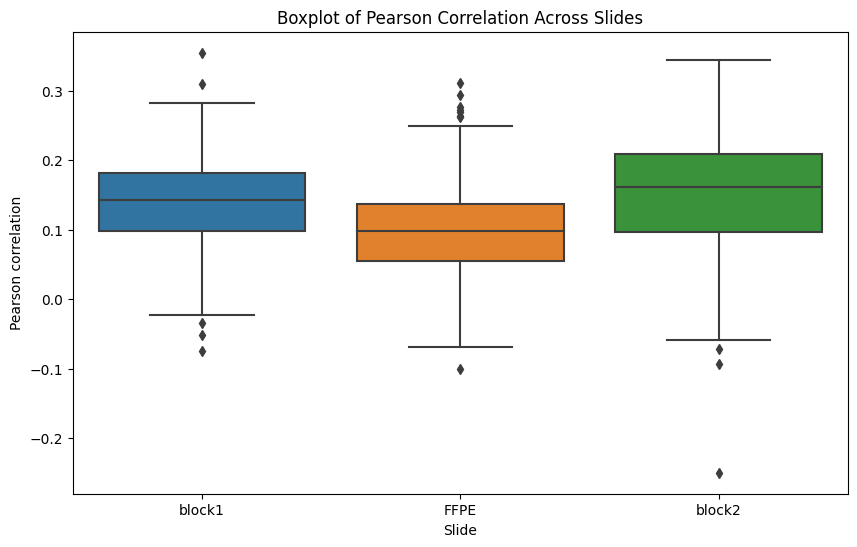

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import gc

plt.figure(figsize=(10, 6))
sns.boxplot(x='Slide', y='Pearson correlation', data=df)
plt.title('Boxplot of Pearson Correlation Across Slides')
gc.collect()
plt.show()

## Alex

In [6]:
import os
import pandas as pd

res = os.listdir("./Breast_Cancer/Alex/")
df = [pd.read_csv("./Breast_Cancer/Alex/"+i, index_col=[0]) for i in res]
df = pd.concat(df)
df
    

,Pearson correlation,Gene,Slide,Method
ISG15,0.705595,ISG15,CID4535,Hist2ST
PLA2G2D,0.187361,PLA2G2D,CID4535,Hist2ST
CAMK2N1,0.526289,CAMK2N1,CID4535,Hist2ST
USP48,0.239625,USP48,CID4535,Hist2ST
TCEA3,0.415859,TCEA3,CID4535,Hist2ST
...,...,...,...,...
CYBB,0.182691,CYBB,CID4290,Hist2ST
ITM2A,0.046954,ITM2A,CID4290,Hist2ST
SH3BGRL,0.506571,SH3BGRL,CID4290,Hist2ST
BEX3,0.225322,BEX3,CID4290,Hist2ST


In [7]:
import pandas as pd

# Group by 'Slide'
grouped = df.groupby('Slide')

# Find top 20% genes for each slide based on Pearson correlation
result = pd.DataFrame()
top_genes_per_slide = []
for name, group in grouped:
    # Sort genes based on Pearson correlation
    sorted_genes = group.sort_values(by='Pearson correlation', ascending=False)

    # Calculate the index to select the top 25%
    top_20_percent_index = int(0.25 * len(sorted_genes))

    # Select top 20% genes
    top_20_percent_genes = sorted_genes.head(top_20_percent_index)

    # Append the result to the final DataFrame
    result = pd.concat([result, top_20_percent_genes])
    
    # Append the top genes for this slide to the list
    top_genes_per_slide.append(set(top_20_percent_genes['Gene']))

# Find the intersection of top genes across all slides
intersection_genes = set.intersection(*top_genes_per_slide)

# Display the intersection genes
print(f"There are {len(intersection_genes)} predictable genes across Alex and 10x datasets.\nIntersection of Top Genes Across Slides:\n{list(intersection_genes)}")

# Display the result
result


There are 14 predictable genes across Alex and 10x datasets.
Intersection of Top Genes Across Slides:
['NDUFC1', 'NAA20', 'TMEM258', 'COMMD6', 'RBX1', 'SRSF7', 'GHITM', 'SNRPG', 'PDCD5', 'COX17', 'CCT8', 'GNG5', 'MPC2', 'SF3B5']


,Pearson correlation,Gene,Slide,Method
SCGB3A1,0.138953,SCGB3A1,1142243F,Hist2ST
MAGEF1,0.117066,MAGEF1,1142243F,Hist2ST
SNRPG,0.116751,SNRPG,1142243F,Hist2ST
COX17,0.113816,COX17,1142243F,Hist2ST
ITGA6,0.097857,ITGA6,1142243F,Hist2ST
...,...,...,...,...
CXCL9,0.501936,CXCL9,CID4535,Hist2ST
TSG101,0.500165,TSG101,CID4535,Hist2ST
TESMIN,0.498543,TESMIN,CID4535,Hist2ST
OAT,0.497180,OAT,CID4535,Hist2ST


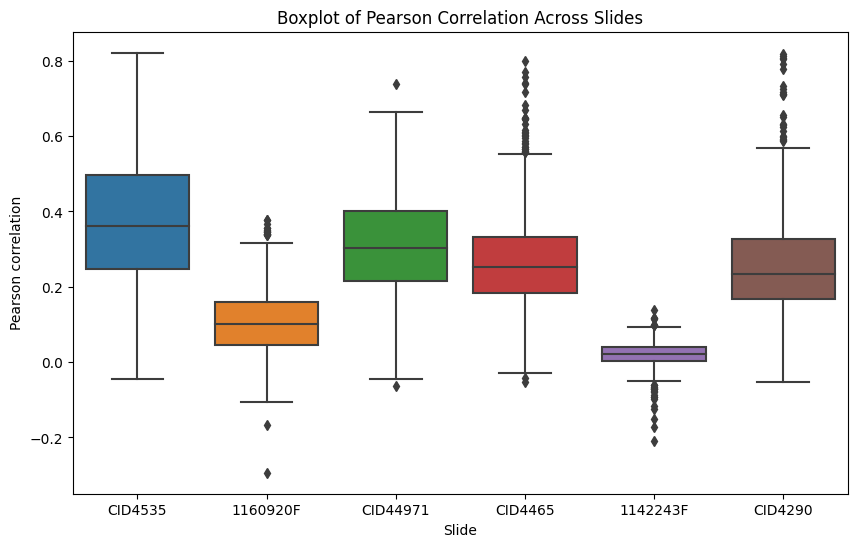

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import gc

plt.figure(figsize=(10, 6))
sns.boxplot(x='Slide', y='Pearson correlation', data=df)
plt.title('Boxplot of Pearson Correlation Across Slides')
gc.collect()
plt.show()

## Combined

In [9]:
import os
import pandas as pd

res1 = os.listdir("./Breast_Cancer/Alex/")
df1 = [pd.read_csv("./Breast_Cancer/Alex/"+i, index_col=[0]) for i in res1]
res2 = os.listdir("./Breast_Cancer/10X/")
df2 = [pd.read_csv("./Breast_Cancer/10X/"+i, index_col=[0]) for i in res2]
df = df1+df2
df = pd.concat(df)
df
    

,Pearson correlation,Gene,Slide,Method
ISG15,0.705595,ISG15,CID4535,Hist2ST
PLA2G2D,0.187361,PLA2G2D,CID4535,Hist2ST
CAMK2N1,0.526289,CAMK2N1,CID4535,Hist2ST
USP48,0.239625,USP48,CID4535,Hist2ST
TCEA3,0.415859,TCEA3,CID4535,Hist2ST
...,...,...,...,...
CYBB,0.122041,CYBB,block2,Hist2ST
ITM2A,0.100643,ITM2A,block2,Hist2ST
SH3BGRL,0.239077,SH3BGRL,block2,Hist2ST
BEX3,0.210675,BEX3,block2,Hist2ST


In [10]:
# Group by 'Slide'
grouped = df.groupby('Slide')

# Find top 20% genes for each slide based on Pearson correlation
result = pd.DataFrame()
top_genes_per_slide = []
for name, group in grouped:
    # Sort genes based on Pearson correlation
    sorted_genes = group.sort_values(by='Pearson correlation', ascending=False)

    # Calculate the index to select the top 25%
    top_20_percent_index = int(0.25 * len(sorted_genes))

    # Select top 20% genes
    top_20_percent_genes = sorted_genes.head(top_20_percent_index)

    # Append the result to the final DataFrame
    result = pd.concat([result, top_20_percent_genes])
    
    # Append the top genes for this slide to the list
    top_genes_per_slide.append(set(top_20_percent_genes['Gene']))

# Find the intersection of top genes across all slides
intersection_genes = set.intersection(*top_genes_per_slide)

# Display the intersection genes
print(f"There are {len(intersection_genes)} predictable genes across Alex and 10x datasets.\nIntersection of Top Genes Across Slides:\n{list(intersection_genes)}")

# Display the result
result


There are 3 predictable genes across Alex and 10x datasets.
Intersection of Top Genes Across Slides:
['NAA20', 'TMEM258', 'CCT8']


,Pearson correlation,Gene,Slide,Method
SCGB3A1,0.138953,SCGB3A1,1142243F,Hist2ST
MAGEF1,0.117066,MAGEF1,1142243F,Hist2ST
SNRPG,0.116751,SNRPG,1142243F,Hist2ST
COX17,0.113816,COX17,1142243F,Hist2ST
ITGA6,0.097857,ITGA6,1142243F,Hist2ST
...,...,...,...,...
BEX3,0.210675,BEX3,block2,Hist2ST
CCL21,0.210445,CCL21,block2,Hist2ST
PLPP5,0.210134,PLPP5,block2,Hist2ST
GOSR1,0.209666,GOSR1,block2,Hist2ST


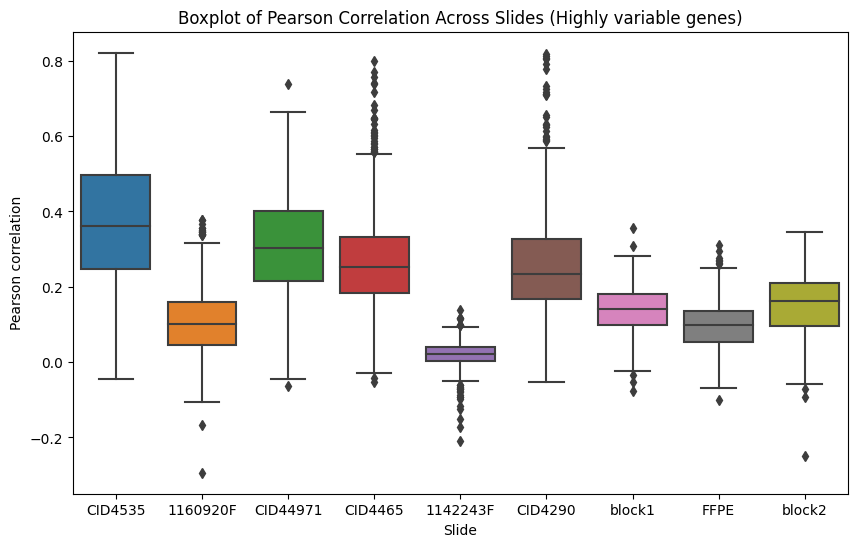

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import gc

plt.figure(figsize=(10, 6))
sns.boxplot(x='Slide', y='Pearson correlation', data=df)
plt.title('Boxplot of Pearson Correlation Across Slides (Highly variable genes)')
gc.collect()
plt.show()

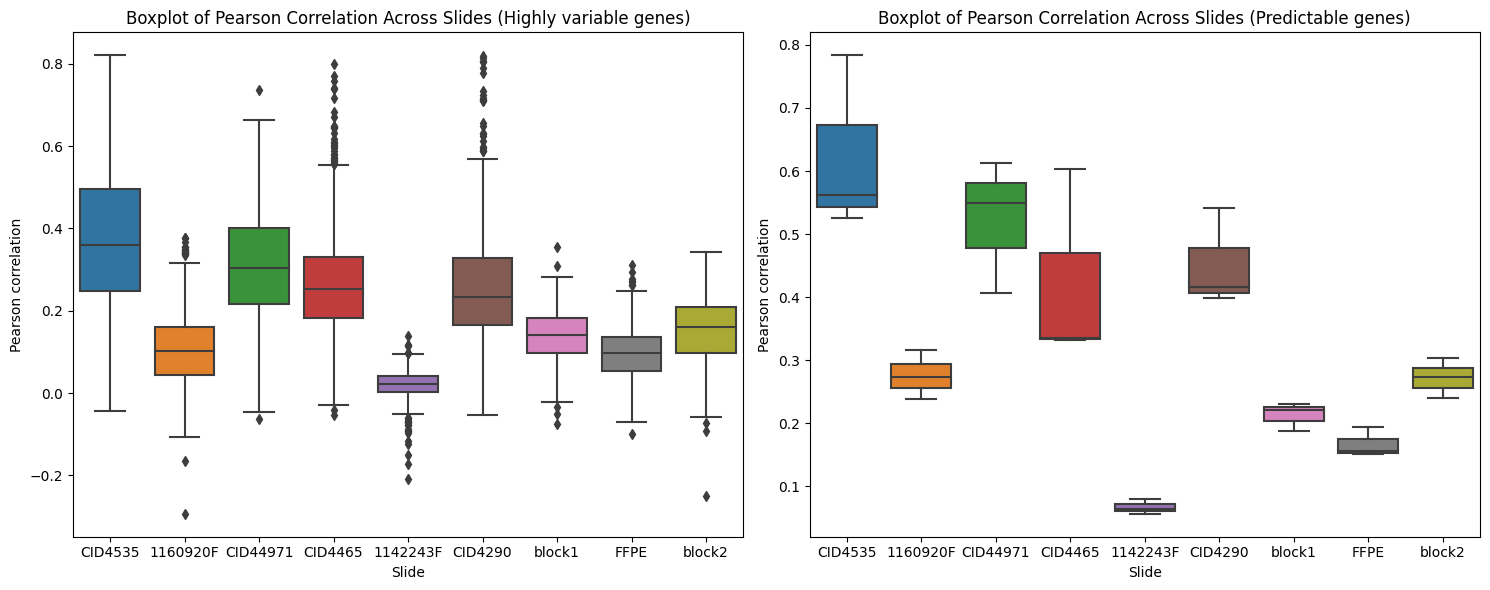

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import gc  # Assuming you need garbage collection for some reason

# First plot
plt.figure(figsize=(15, 6))  # Increase the width to accommodate two plots side by side
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.boxplot(x='Slide', y='Pearson correlation', data=df)
plt.title('Boxplot of Pearson Correlation Across Slides (Highly variable genes)')
gc.collect()

# Second plot
predictable_genes = df[df["Gene"].isin(intersection_genes)]
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.boxplot(x='Slide', y='Pearson correlation', data=predictable_genes)
plt.title('Boxplot of Pearson Correlation Across Slides (Predictable genes)')
gc.collect()

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()
